### Codio Activity 23.2: Convolutional Neural Network

This activity focuses on using a basic convolutional architecture to predict handwritten digits from the `mnist` dataset.  Your goal is to again use the preprocessing tools of `keras` to prepare the data.  Next, you will use the `Conv2D` and `MaxPool2D` layers to create the feature maps of digits.   Finally, you will flatten the resulting feature maps and pass them through a conventional dense architecture.

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)

Run the code cell below to import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
warnings.filterwarnings('ignore')

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist


### Problem 1

#### Loading the Data

Below, use the function `load_data()` on the `mnist` dataset to load the dataset. Assign your dataset to the variable `(X_train, Y_train), (X_test, Y_test)` below.

Use the function `reshape` on `X_train` to reshape the training data in anticipation of the convolutional layers: set the arguments of the function `reshape ` equal to `(60_000, 28, 28, 1)`.  Assign this object to `X_train`.

Use the function `reshape` on `X_test` to reshape the testing data in anticipation of the convolutional layers: set the arguments of the function `reshape ` equal to `(10_000, 28, 28, 1)`.  Assign this object to `X_test`.


Create an `ImageDataGenerator` object with the argument `rescale = 1/255.` and assign to the variable `gen`.  

Use the function `to_categorical` to convert the training and testing target variables. Assign these new objects to `Y_train` and `Y_test`, respectively.

Use the `.flow()` function on the generator `gen`  with the reshaped and dummied `X_train` and `Y_train` to create the `train_gen` object.

Use the `.flow()` function on the generator `gen`  with the reshaped and dummied `X_test` and `Y_test` to create the `test_gen` object.


NOTE: This question is computationally expensive, so please be patient with the processing. It may take a few minutes based on your computing power. 

In [8]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = ('', ''), ('', '')
X_train = ''
X_test = ''
gen = ''
Y_train = ''
Y_test = ''
train_gen = ''
test_gen = ''

In [14]:
tf.random.set_seed(42)
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(60_000, 28, 28, 1)
X_test = X_test.reshape(10_000, 28, 28, 1)
gen = ImageDataGenerator(rescale = 1/255.)
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
train_gen = gen.flow(X_train, Y_train)
test_gen = gen.flow(X_test, Y_test)

print(train_gen)
print(X_train.shape)
print(Y_train.shape)

(60000, 28, 28, 1)
(60000, 10)


### Problem 2

#### Constructing the Convolutional Layers

Below, create a neural network named `conv_model` using the following architecture:

- One `Conv2D` layer with 16 filters and a kernel of size equal to 3 x 3 with `relu` activation
- One `MaxPool2D` layer with pool size equal to 2 x 2
- One `Flatten` layer to flatten the results of pooling
- One `Dense` layer with 50 nodes and `relu` activation
- One `Dense` output layer 10 noded and with `softmax` activation

Compile `conv_model` using `categorical_crossentropy` as your `loss` and  `accuracy` as your `metric`.

In [15]:
tf.random.set_seed(42)
conv_model = Sequential([Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu'),
                         MaxPool2D(pool_size = (2,2)),
                         Flatten(),
                         Dense(50, activation = 'relu'),
                         Dense(10, activation = 'softmax')
    
])
conv_model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'] )
conv_model.build(input_shape = (X_train.shape[0], 28, 28, 1))
conv_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (60000, 26, 26, 16)       160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (60000, 13, 13, 16)       0         
_________________________________________________________________
flatten_2 (Flatten)          (60000, 2704)             0         
_________________________________________________________________
dense_4 (Dense)              (60000, 50)               135250    
_________________________________________________________________
dense_5 (Dense)              (60000, 10)               510       
Total params: 135,920
Trainable params: 135,920
Non-trainable params: 0
_________________________________________________________________


### Problem 3

#### Examining the Training


Use the `fit()` function on `conv_model` to fit the reshaped training data `train_gen`. Set the argument `validation_data` equal to `test_gen`, the argument `epochs` equal to 1, and the argument `verbose` equal to 0.  Assign the result to the variable `history` below. Feel free to uncomment the code to visualize the resulting fit accuracies.

NOTE: This question is computationally expensive, so please be patient with the processing. It may take a few minutes based on your computing power. 

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_begin', 'on_test_batch_end', 'on_test_begin', 'on_test_end', 'on_train_batch_begin', 'on_train_batch_end', 'on_train_begin', 'on_train_end', 'params', 'set_model', 'set_params', 'validation_data']


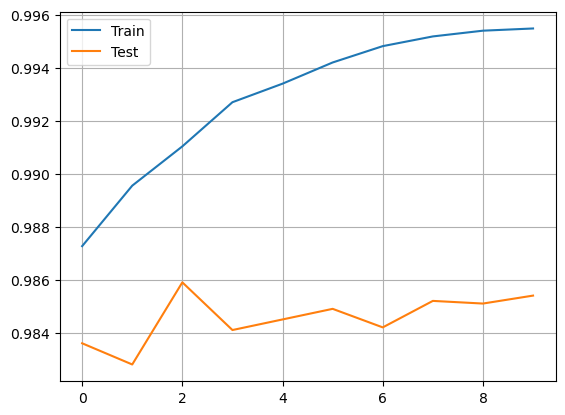

In [24]:
tf.random.set_seed(42)
history = conv_model.fit(train_gen, validation_data = test_gen, epochs = 10, verbose = 0)
print(dir(history))
plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], label = 'Test')
plt.grid()
plt.legend();

In [25]:
history.history

{'loss': [0.04328025132417679,
  0.03619915619492531,
  0.03032972291111946,
  0.026754576712846756,
  0.023090776056051254,
  0.020914262160658836,
  0.018399516120553017,
  0.017244741320610046,
  0.016044948250055313,
  0.014909127727150917],
 'accuracy': [0.9872666597366333,
  0.989549994468689,
  0.9910333156585693,
  0.9926999807357788,
  0.993399977684021,
  0.9941999912261963,
  0.9948166608810425,
  0.9951833486557007,
  0.9954000115394592,
  0.9954833388328552],
 'val_loss': [0.05224226787686348,
  0.053893085569143295,
  0.04680516943335533,
  0.05029391124844551,
  0.051624152809381485,
  0.0535115972161293,
  0.05704345181584358,
  0.05191030725836754,
  0.05480751767754555,
  0.058869123458862305],
 'val_accuracy': [0.9836000204086304,
  0.9828000068664551,
  0.9858999848365784,
  0.9840999841690063,
  0.984499990940094,
  0.9848999977111816,
  0.9842000007629395,
  0.9851999878883362,
  0.9850999712944031,
  0.9854000210762024]}

In [16]:
tf.random.set_seed(42)
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(60_000, 28, 28, 1)
X_test = X_test.reshape(10_000, 28, 28, 1)
gen = ImageDataGenerator(rescale=1/255.)
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
train_gen = gen.flow(X_train, Y_train)
test_gen = gen.flow(X_test, Y_test)
### END SOLUTION

### ANSWER CHECK
print(train_gen)
print(X_train.shape)
print(Y_train.shape)

(60000, 28, 28, 1)
(60000, 10)


In [17]:
tf.random.set_seed(42)
conv_model = Sequential([Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu'),
                   MaxPool2D(pool_size = (2, 2)),
                   Flatten(),
                   Dense(50, activation = 'relu'),
                   Dense(10, activation = 'softmax')])
conv_model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])
### END SOLUTION

### ANSWER CHECK
conv_model.build(input_shape = (X_train.shape[0], 28, 28, 1))
conv_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (60000, 26, 26, 16)       160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (60000, 13, 13, 16)       0         
_________________________________________________________________
flatten_3 (Flatten)          (60000, 2704)             0         
_________________________________________________________________
dense_6 (Dense)              (60000, 50)               135250    
_________________________________________________________________
dense_7 (Dense)              (60000, 10)               510       
Total params: 135,920
Trainable params: 135,920
Non-trainable params: 0
_________________________________________________________________


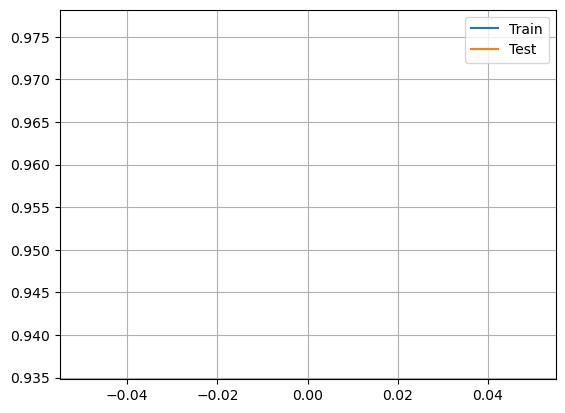

In [18]:
tf.random.set_seed(42)
history = conv_model.fit(train_gen, validation_data=test_gen, epochs=1, verbose = 0)
### END SOLUTION

### ANSWER CHECK
plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], label = 'Test')
plt.grid()
plt.legend();

### Problem 4

#### Predicting with a New Image

Below, we have defined the object `test_images` for you with 5 observations. 

Use the function `reshape` on `test_images` with argument equal to `(num_observations, 28, 28, 1)`. Assign this new object to `test_images_shaped`.

Next, use the function `predict()` on the `conv_model` object with argument equal to `test_images_shaped`. Use the function NumPy  function `argmax` to retrieve the indices of the maximum elements in the array along the `axis` 1.
Assign the result to the variable `preds`.

HINT: The pseudocode for this last step is given below:

```Python
preds = np.argmax(conv_model.predict(...), axis = ...)
```


In [26]:
tf.random.set_seed(42)
test_images = X_test[:5]
preds = ''


tf.random.set_seed(42)
test_images_shaped = test_images.reshape(5, 28, 28, 1)
preds = np.argmax(conv_model.predict(test_images_shaped), axis = 1)

print(preds)


[7 2 8 0 4]


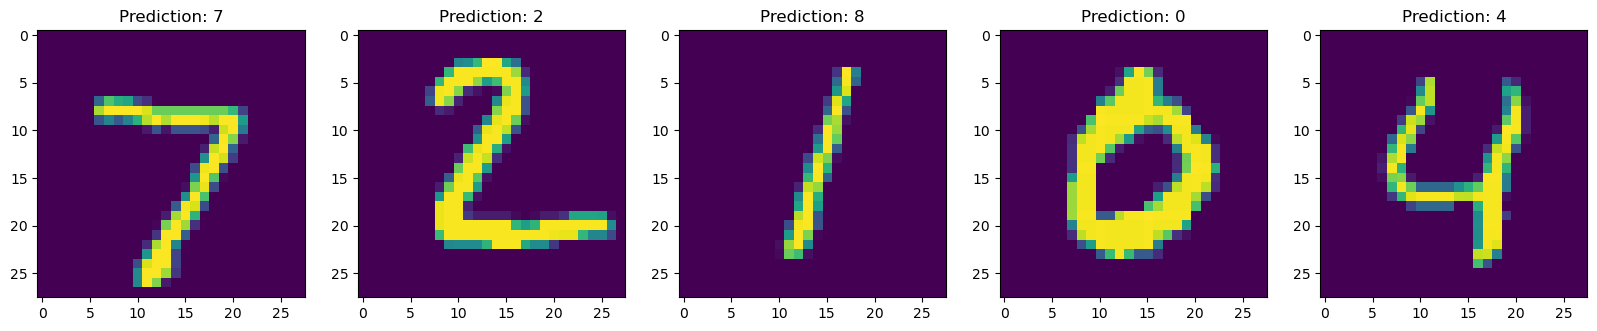

In [27]:
fig, ax = plt.subplots(1, 5, figsize = (20, 4))
for i, im in enumerate(test_images):
    ax[i].imshow(im.reshape(28, 28))
    ax[i].set_title(f'Prediction: {preds[i]}')